In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
import matplotlib

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [3]:
pd.set_option('display.max_columns', None)

In [45]:
position_history = pd.read_csv('../data/raw/TRUMPF_Indoor_Logistik_Dataset/position_history_new_starts_at_01.07.2018.tsv', delimiter='\t')

In [46]:
# items = pd.read_csv('../data/raw/TRUMPF_Indoor_Logistik_Dataset/items.tsv', delimiter='\t', engine='python')
# items_history = pd.read_csv('../data/raw/TRUMPF_Indoor_Logistik_Dataset/itemshistory.tsv', delimiter='\t', engine='python')
areas = pd.read_csv('../data/raw/TRUMPF_Indoor_Logistik_Dataset/areas.tsv', delimiter='\t', engine='python')

In [47]:
position_history.head()

,id,address,x,y,z,timestamp
0,5364352,-359037136983245745,9.85794,-0.549547,1.852340,1530403279184
1,5364354,-359037136983245745,9.78791,-0.549547,1.846210,1530403280444
2,5364356,-359037136983245745,9.69488,-0.549547,1.846210,1530403281720
3,5364358,4751451578702838656,9.76520,-0.279698,1.446820,1530403284146
4,5364359,-145401774635637016,9.24891,-0.606032,0.984861,1530403284181


In [48]:
def clean_df(df, Xmin = -62.5, Xmax = 53.6, Ymax = 67.5, Ymin = -14.325):    
    # adjust timestamp
    df.timestamp = df.timestamp.apply(lambda x: dt.datetime.fromtimestamp(x/1000).strftime("%y.%m.%d;%H:%M:%S%z"))
    df.timestamp = pd.to_datetime(df.timestamp, format="%y.%m.%d;%H:%M:%S")

    # remove minus from address
    df.address = df.address.abs()

    # invert y-axis
    df.y = -1*df.y

    # drop columns
    df.drop(['id', 'z'], axis=1, inplace=True)
    
    return df[(df['x'] > Xmin) & (df['x'] < Xmax) & (df['y'] > Ymin) & (df['y'] < Ymax)]

In [49]:
def resample_df(df, interval='10S'):
    # resample
    temp = df.set_index('timestamp').groupby('address')['x', 'y'].resample('10S').mean()
    
    temp = temp.dropna()
    
    # fill na
    #df.fillna(method='ffill', inplace=True)

    # round
    temp = temp.round(1)
    
    return temp

In [50]:
df = clean_df(position_history)

In [51]:
df.head()

,address,x,y,timestamp
0,359037136983245745,9.85794,0.549547,2018-07-01 02:01:19
1,359037136983245745,9.78791,0.549547,2018-07-01 02:01:20
2,359037136983245745,9.69488,0.549547,2018-07-01 02:01:21
3,4751451578702838656,9.76520,0.279698,2018-07-01 02:01:24
4,145401774635637016,9.24891,0.606032,2018-07-01 02:01:24


In [52]:
df10s = resample_df(df, '10S')

In [53]:
df10s.shape

(1397456, 2)

In [54]:
df10s.head()

x    y
address           timestamp                    
17234330878955929 2018-09-26 15:27:40  0.0  0.0
                  2018-10-10 15:34:00  8.3  0.5
                  2018-10-10 15:34:50  8.5  0.6
                  2018-10-10 15:35:00  8.6  0.6
                  2018-10-10 15:35:10  8.6  0.6

In [27]:
# df10s.to_csv('df10s.csv', index=False)

# Plots

In [19]:
neuer_Auftrag = np.array([[7.297733907668686,-4.805841773673882],[7.297733907668686,-3.052331795888114],[11.52842464772324,-2.8296638622010324],
                          [11.361423697457928,-4.666674315119456],[7.297733907668686,-4.805841773673882]])

In [39]:
def plot_path(df, address=359037136983245745):
    temp = df.loc[address]
    plt.plot(temp.x, temp.y)
    plt.plot(neuer_Auftrag[:, 0], -1*neuer_Auftrag[:, 1])
    plt.show()

In [40]:
def scatter_path(df, address=359037136983245745):
    temp = df.loc[address]
    plt.scatter(temp.x, temp.y)
    plt.plot(neuer_Auftrag[:, 0], -1*neuer_Auftrag[:, 1], color='red')
    plt.show()

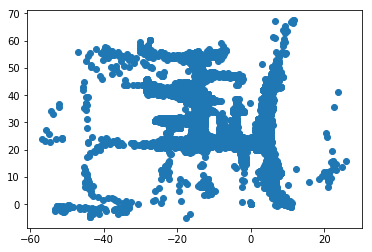

In [46]:
scatter_path(df10s)

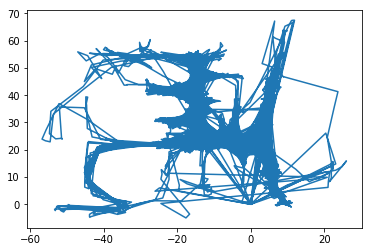

In [47]:
plot_path(df10s)

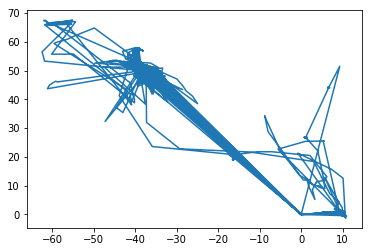

In [49]:
plot_path(df10s, 914845595629141593)

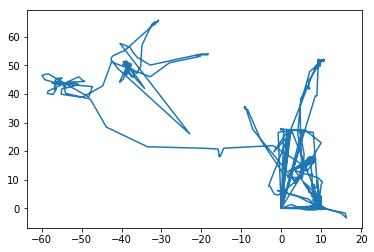

In [50]:
plot_path(df10s, 145401774635637016)

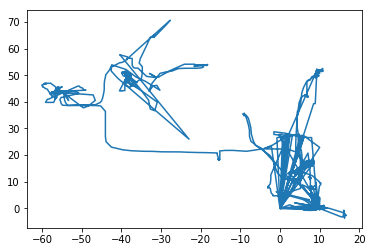

In [74]:
plot_path(position_history, 145401774635637016)

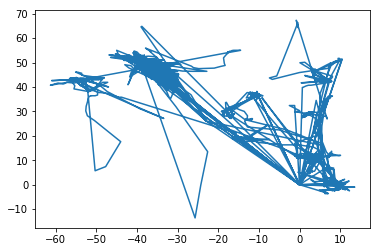

In [51]:
plot_path(df10s, 4751451578702838656)

In [52]:
df10s.head()

x    y
address           timestamp                    
17234330878955929 2018-09-26 15:27:40  0.0  0.0
                  2018-10-10 15:34:00  8.3  0.5
                  2018-10-10 15:34:50  8.5  0.6
                  2018-10-10 15:35:00  8.6  0.6
                  2018-10-10 15:35:10  8.6  0.6

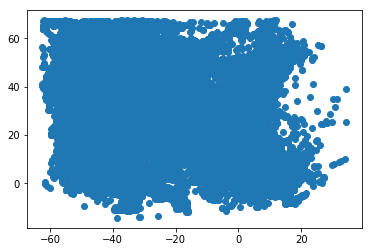

In [53]:
plt.scatter(df10s.x, df10s.y)

# Add Polygon

In [106]:
#areas.loc[areas.name == 'neuer Auftrag', 'shape'].values

In [93]:
neuer_Auftrag = np.array([[7.297733907668686,-4.805841773673882],[7.297733907668686,-3.052331795888114],[11.52842464772324,-2.8296638622010324],
                          [11.361423697457928,-4.666674315119456],[7.297733907668686,-4.805841773673882]])

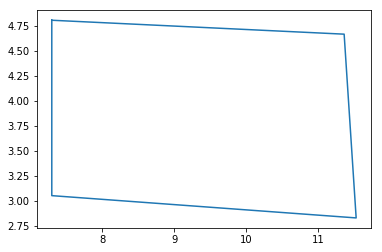

In [100]:
plt.plot(neuer_Auftrag[:, 0], -1*neuer_Auftrag[:, 1])

In [86]:
# fig, ax = plt.subplots()
# patches = []
# polygon = Polygon([[-56.02275307040888,-53.388333277776034],[-45.42429711068058,-53.388333277776034],
#                        [-45.4662947198514,-6.483172597874294],[-56.44473725115092,-6.6503570019042355],
#                        [-56.02275307040888,-53.388333277776034]], True)
# patches.append(polygon)

# colors = 100*np.random.rand(len(patches))
# p = PatchCollection(patches, alpha=0.5)
# p.set_array(np.array(colors))

# ax.add_collection(p)

# plt.show()